In [12]:
### Exploring Wavelet Transform
import pywt
from math import sqrt

In [2]:
for family in pywt.families():
    print(family, ":", pywt.wavelist(family))

haar : ['haar']
db : ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym : ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif : ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior : ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio : ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8'

In [3]:
w1=pywt.Wavelet("db2") #DWT 

In [8]:
w2=pywt.ContinuousWavelet("gaus2") #CWT

In [9]:
print(w2)

ContinuousWavelet gaus2
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


In [11]:
w1.filter_bank

([-0.12940952255126037,
  0.2241438680420134,
  0.8365163037378079,
  0.48296291314453416],
 [-0.48296291314453416,
  0.8365163037378079,
  -0.2241438680420134,
  -0.12940952255126037],
 [0.48296291314453416,
  0.8365163037378079,
  0.2241438680420134,
  -0.12940952255126037],
 [-0.12940952255126037,
  -0.2241438680420134,
  0.8365163037378079,
  -0.48296291314453416])

In [13]:
## Create Custom Wavelet Objects
custom_filter_bank=[[sqrt(2)/2 ,sqrt(2)/2 ],[-sqrt(2)/2 , sqrt(2)/2],[sqrt(2)/2,sqrt(2)/2],[sqrt(2)/2,-sqrt(2)/2]]

In [15]:
MyWavelet=pywt.Wavelet("CustomWavelet",filter_bank=custom_filter_bank)

In [17]:
print(MyWavelet)

Wavelet CustomWavelet
  Family name:
  Short name:
  Filters length: 2
  Orthogonal:     False
  Biorthogonal:   False
  Symmetry:       unknown
  DWT:            True
  CWT:            False


In [26]:
## Wave fun to approximate of the wavelet and scale function 
## Wavelet.wavefun(level) level indicates level of approximation
w= pywt.Wavelet('sym3') 
#for orthogonal wavelets returns approximations of scaling function and wavelet function with corresponding x-grid coordinates
(phi , psi,x) = w.wavefun(level=5)


In [31]:
w2=pywt.Wavelet('bior1.3')
(phi_d, psi_d, phi_r,psi_r,x)= w2.wavefun(level=3) ## As level increases we get better approx of wavelet scaling function but that increases
## the computational burden 


In [32]:
## Apply wavelet transform to a signal x
x=[3,7,1,1,-2,5,4,6]
cA,cD=pywt.dwt(x,'sym3') 



In [35]:
cD ,cA 

(array([-2.11206142, -2.64704675, -3.16825651, -0.67715519,  0.56811154,
         2.70377533]),
 array([ 3.94393174,  5.13370878,  7.31813271, -0.58565539,  4.02681785,
         7.89359325]))

In [38]:
y=pywt.idwt(cA,cD,'sym3')  ## inverse wavelet transform ....# you can remove noise from the signal by setting threshold on the coefficients and then inverse wavelet transform
y

array([ 3.,  7.,  1.,  1., -2.,  5.,  4.,  6.])

In [39]:
## Signal Extension Modes 
aa = pywt.Wavelet('sym3')
cA,cD =pywt.dwt(x,wavelet=aa , mode='zero')  ## padding is zero outside border of the signal..default mode is symmetry ..can also use constant mode
  


In [40]:
pywt.idwt([1,2,0,1],None,'db2','symmetric') ## one way of inverse wavelet transform

array([ 1.19006969,  1.54362308,  0.44828774, -0.25881905,  0.48296291,
        0.8365163 ])

In [41]:
pywt.idwt(None, [1,2,0,1],'db2','symmetric')## one way of inverse wavelet transform

array([ 0.57769726, -0.93125065,  1.67303261, -0.96592583, -0.12940952,
       -0.22414387])

In [42]:
pywt.idwt([1,2,0,1],[0,0,0,0],'db2','symmetric')## one way of inverse wavelet transform input vectors should have same length if both specified

array([ 1.19006969,  1.54362308,  0.44828774, -0.25881905,  0.48296291,
        0.8365163 ])

In [49]:
x=[1,2,3,4,5,6,7,8]
coeffs=pywt.wavedec(x,'db1',level=1)
coeffs

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

In [50]:
## Multilevel 1D wavelet transform
x=[1,2,3,4,5,6,7,8]
coeffs=pywt.wavedec(x,'db1',level=2)
coeffs  ## Note array size is half of the input and with every level size is halved  

[array([ 5., 13.]),
 array([-2., -2.]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

In [47]:
x=[1,2,3,4,5,6,7,8]
coeffs=pywt.wavedec(x,'db1',level=3)
coeffs

[array([12.72792206]),
 array([-5.65685425]),
 array([-2., -2.]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

In [51]:
cA2,cD2,cD1=pywt.wavedec(x,'db1',level=2)

In [52]:
cA2

array([ 5., 13.])

In [53]:
cD2

array([-2., -2.])

In [54]:
cD1

array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])

In [57]:
#partial Discrete wavelet transform data decomposition downcoeff
(cA,cD)=pywt.dwt(x,'db2','zero')
coeff=pywt.downcoef('a',x,'db2',mode='zero',level=1) # 'a' for approximation coefficient and 'd' for detail coefficient
coeff

array([-0.03467518,  2.31078903,  5.13921616,  7.96764328, 10.07287082])

In [59]:
coeff=pywt.downcoef('d',x,'db2',mode='zero',level=1) 
coeff

array([-1.29409523e-01,  1.66533454e-16,  3.33066907e-16,  2.22044605e-16,
       -2.69901760e+00])

In [60]:
coeff=pywt.downcoef('d',x,'db2',mode='zero',level=3) 
coeff

array([-1.24049596,  6.77394497, -2.56632118])

In [63]:
# 2D Forward and Inverse Discrete Wavelet Transform  pip install opencv-python
import cv2

In [104]:
img=cv2.imread('python-logo.png',0)
coeffs=pywt.dwt2(img,'haar')
cA,(cH,cV,cD)=coeffs
img_out=pywt.idwt2(coeffs,'haar')

In [68]:
coeffs=pywt.wavedec2(img,'haar','zero',level=1)
cA,(cH,cV,cD)=coeffs
img_out=pywt.waverec2(coeffs,'haar','zero')

In [72]:
coeffs=pywt.wavedec2(img,'haar','zero',level=2)
cA,(cH2,cV2,cD2),(cH1,cV1,cD1) =coeffs
img_out=pywt.waverec2(coeffs,'haar','zero')

In [73]:
#nD Forward and Discrete Wavelet Transform 
coeffs=pywt.dwtn(img,'haar')
img_out=pywt.idwtn(coeffs,'haar')


In [76]:
coeffs.keys() ## dictionary  'aad' approx on 1st and 2nd dimension and detail on the third dimension 


dict_keys(['aaa', 'aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])

In [78]:
coeffs=pywt.wavedecn(img,'haar','zero',level=1)
img_out=pywt.waverecn(coeffs,'haar','zero')

In [82]:
coeffs[1].keys()

dict_keys(['aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])

In [84]:
coeffs[0] # this is 'aaa'

array([[[718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        ...,
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484]],

       [[718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        ...,
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484]],

       [[718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        ...,
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484]],

       ...,

       [[300.520382  , 150.260191  ],
        [288.49956672, 144.24978336],
        [283.54981926, 141.77490963],
        ...,
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484],
        [718.42048969, 359.21024484]],

       [[695.79

In [85]:
#Handling DWT coefficients


In [89]:
x=[1, 2, 3, 4, 5, 6, 7, 8]
coeffs=pywt.wavedec(x,'haar','symmetric',level=1)
arr,coeff_slices=pywt.coeffs_to_array(coeffs)

In [91]:
coeff_slices

[(slice(None, 4, None),), {'d': (slice(4, 8, None),)}]

In [92]:
arr

array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172, -0.70710678,
       -0.70710678, -0.70710678, -0.70710678])

In [93]:
coeff_from_arr=pywt.array_to_coeffs(arr,coeff_slices,output_format='wavedec')


In [95]:
coeff_from_arr

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

In [96]:
## Handling DWT Coefficients
cam=pywt.data.camera()

In [99]:
coeffs=pywt.wavedecn(cam,'db2',level=3)
arr,coeff_slices,coeff_shapes=pywt.ravel_coeffs(coeffs)

In [103]:
coeff_from_arr=pywt.unravel_coeffs(arr,coeff_slices,coeff_shapes,output_format='wavedecn')
cam_recon=pywt.waverecn(coeff_from_arr,wavelet='db2')

In [109]:
##Stationary Wavelet Transform 
coeffs1=pywt.swt(x,'db2',level=3)
img=cv2.imread('python-logo.png',0)
# coeffs2=pywt.swt2(img,'haar',level=2)
# coeffsn=pywt.swtn(img,'haar',level=2)

In [110]:
y=pywt.iswt(coeffs1,'db2')
y

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [112]:
#y2=pywt.iswt2(coeffs2,'haar')
#yn=pywt.iswt2(coeffsn,'haar')


In [113]:
##Continuous Wavelet Transform 
#coef,freq=pywt.cwt(data, scales, wavelet)
wavelist=pywt.wavelist(kind='continuous')
wavelist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

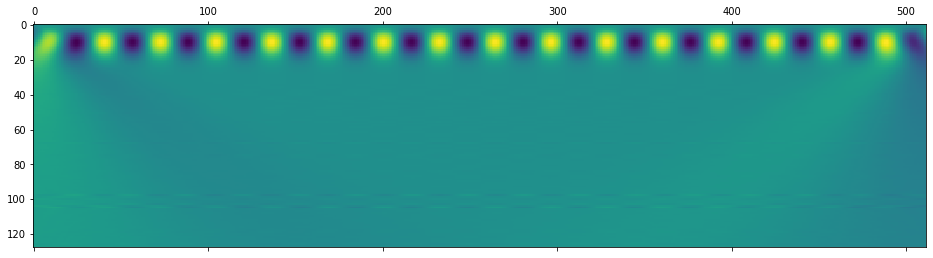

In [116]:
import numpy as np 
import matplotlib.pyplot as plt 
x=np.arange(512)
y=np.sin(2*np.pi*x/32.)
coef,freqs=pywt.cwt(y,np.arange(1,129),'gaus2')
plt.matshow(coef)
plt.show()

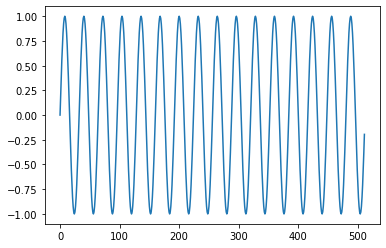

In [118]:
plt.plot(y);

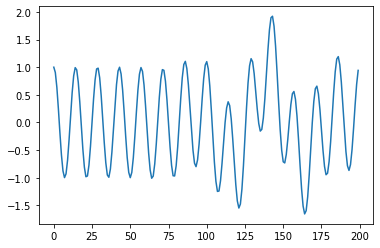

In [127]:
t=np.linspace(-1,1,200,endpoint=False)
sig=np.cos(2.*np.pi*7.*t) + np.real(np.exp(-7.*(t-.4)**2.)*np.exp(1j*2*np.pi*2*(t-0.4)))
plt.plot(sig);

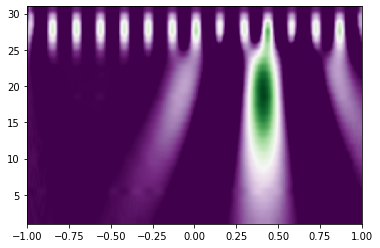

In [133]:
widths=np.arange(1,31)
cwtmatr,freqs=pywt.cwt(sig,widths,'mexh')
plt.imshow(cwtmatr,extent=[-1,1,1,31],cmap='PRGn',aspect='auto', vmax=abs(cwtmatr).max() , vmin=-abs(cwtmatr).min())
plt.show()